# Business Understanding

Authors: Bendix Haß and Frauke Albrecht

<div>
<img src="drugs4.png" width="200"/>
</div>

Evaluating the risk whether a person tends to consume drugs is not only important for each individual person, but for our entiry society as medical treatment and resozialization of an adicted person is costly. That is each individual of our society has a responsibility to prevent him-/herself to get in touch with drugs. To facilitate that an app was developed to help to self-assess a tendency to become a drug consumer. To do this we used data from a survay, which asked people questions about their demographic background, their personality and their behavior considering drug usage. The dataset is described here: https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29#

In the following our working process is documented.

# Setup

In [514]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.metrics import precision_recall_curve, confusion_matrix, accuracy_score, classification_report, roc_auc_score, recall_score, precision_score
#from sklearn.metrics import plot_precision_recall_curve, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

random_seed = 42

In [515]:
# change some plot default values
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 14
plt.rcParams["patch.force_edgecolor"] = True

# Data Gathering

First, we import the data and get a first overview about it by looking at the dataframe's head and tale. We print the general information, to see the shape of the dataframe, the type of the data and whether there are missing values. Next, we print which unique values each feature takes and finally an overview about important statistical properties. 

In [516]:
df = pd.read_excel('drug_consumption.xls')

In [517]:
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [518]:
df.tail()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0
1884,1888,-0.95197,-0.48246,-0.61113,0.21128,-0.31685,-0.46725,2.12700,1.65653,1.11406,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL6,CL0,CL2


In [519]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
ID           1885 non-null int64
Age          1885 non-null float64
Gender       1885 non-null float64
Education    1885 non-null float64
Country      1885 non-null float64
Ethnicity    1885 non-null float64
Nscore       1885 non-null float64
Escore       1885 non-null float64
Oscore       1885 non-null float64
Ascore       1885 non-null float64
Cscore       1885 non-null float64
Impulsive    1885 non-null float64
SS           1885 non-null float64
Alcohol      1885 non-null object
Amphet       1885 non-null object
Amyl         1885 non-null object
Benzos       1885 non-null object
Caff         1885 non-null object
Cannabis     1885 non-null object
Choc         1885 non-null object
Coke         1885 non-null object
Crack        1885 non-null object
Ecstasy      1885 non-null object
Heroin       1885 non-null object
Ketamine     1885 non-null object
Legalh       1885 non-null objec

In [520]:
df.nunique()

ID           1885
Age             6
Gender          2
Education       9
Country         7
Ethnicity       7
Nscore         49
Escore         42
Oscore         35
Ascore         41
Cscore         41
Impulsive      10
SS             11
Alcohol         7
Amphet          7
Amyl            7
Benzos          7
Caff            7
Cannabis        7
Choc            7
Coke            7
Crack           7
Ecstasy         7
Heroin          7
Ketamine        7
Legalh          7
LSD             7
Meth            7
Shrooms         7
Nicotine        7
Semer           5
VSA             7
dtype: int64

In [521]:
df.describe()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


## Data Structure

The Data consists of three types: 

* Demographic data (Age, Gender, Education, Country, Ethnicity)
* Scores to evaluate the personality (Nscore, Escore, Oscore, Ascore, Cscore, Impulsive, SS)
* Drugs (Alcohol, Amphet, Amyl, Benzos, Caff, Canabis, Choc, Coke, Crack, Ecstasy, Heroin, Ketamine, Legalh, LSD, Meth, Shrooms, Nicotine, Semer, VSA)

We will further divide the drugs in two groups:
* Legal drugs: Alcohol, Caff, Choc, Nicotine
* Drugs: Amphet, Amyl, Benzos, Cannabis, Coke, Crack, Ecstasy, Heroin, Ketamine, Legalh, LSD, Meth, Shrooms, Semer, VSA

The demographic data has been preprocessed to pseudo-continous data, which have an order. E.g. the age intervalls have been converted to real numbers, which are ordered in the sense that a lower age intervall corresponds to a lower number. The Scores have been preprocessed and were converted into a T-Score based on normative data. Further information about the preprocessing can be found [ Fehrman et al. (2017)](https://arxiv.org/pdf/1506.06297.pdf). The drug data are given in 7 categories CL0 to CL6 corresponding to the last usage of each drug (CL0: Never Used, CL1: Used over a Decade Ago, CL2: Used in Last Decade, CL3: Used in Last Year, CL4: Used in Last Month, CL5: Used in Last Week, CL6: Used in Last Day)


| idx | Variable name |              Description              |  data type  | data format |     data preprocessed     |
|:---:|:-------------:|:-------------------------------------:|:-----------:|:-----------:|:-------------------------:|
|  1  |      Age      |               age-group               | demographic | categorical | pseodo-continuous feature |
|  2  |     Gender    |              male/female              | demographic | categorical | pseodo-continuous feature |
|  3  |   Education   |           educational degree          | demographic | categorical | pseodo-continuous feature |
|  4  |    Country    |                country                | demographic | categorical | pseodo-continuous feature |
|  5  |   Ethnicity   |               ethnicity               | demographic | categorical | pseodo-continuous feature |
|  6  |     Nscore    |              Neuroticism              | personality |  continuous |           T-Score           |
|  7  |     Escore    |              Extraversion             | personality |  continuous |           T-Score          |
|  8  |     Oscore    |         Openness to Experience        | personality |  continuous |           T-Score           |
|  9  |     Ascore    |             Agreeableness             | personality |  continuous |           T-Score           |
|  10 |     Cscore    |           Conscientiousness           | personality |  continuous |           T-Score           |
|  11 |   Impulsive   |             Impulsiveness             | personality |  continuous |           -----           |
|  12 |       SS      |        Sensation-Seeking scale        | personality |  continuous |           -----           |
|  13 |    Alcohol    |          alcohol (last cons.)         |   drug-use  | categorical |           -----           |
|  14 |     Amphet    |       amphetamines (last cons.)       |   drug-use  | categorical |           -----           |
|  15 |      Amyl     |       amyl nitrite (last cons.)       |   drug-use  | categorical |           -----           |
|  16 |     Benzos    |      benzodiacepines (last cons.)     |   drug-use  | categorical |           -----           |
|  17 |      Caff     |         caffeine (last cons.)         |   drug-use  | categorical |           -----           |
|  18 |    Cannabis   |         cannabis (last cons.)         |   drug-use  | categorical |           -----           |
|  19 |      Choc     |         chocolate (last cons.)        |   drug-use  | categorical |           -----           |
|  20 |      Coke     |          cocaine(last cons.)          |   drug-use  | categorical |           -----           |
|  21 |     Crack     |           crack(last cons.)           |   drug-use  | categorical |           -----           |
|  22 |    Ecstasy    |          ecstasy(last cons.)          |   drug-use  | categorical |           -----           |
|  23 |     Heroin    |           heroin(last cons.)          |   drug-use  | categorical |           -----           |
|  24 |    Ketamine   |          ketamine(last cons.)         |   drug-use  | categorical |           -----           |
|  25 |     Legalh    |        legal highs(last cons.)        |   drug-use  | categorical |           -----           |
|  26 |      LSD      |            LSD(last cons.)            |   drug-use  | categorical |           -----           |
|  27 |      Meth     |         methadone(last cons.)         |   drug-use  | categorical |           -----           |
|  28 |    Shrooms    |      magic mushrooms(last cons.)      |   drug-use  | categorical |           -----           |
|  29 |    Nicotine   |          nicotine(last cons.)         |   drug-use  | categorical |           -----           |
|  30 |     Semer     |   fictinous drug: Semer (last cons.)  |   drug-use  | categorical |           -----           |
|  31 |      VSA      | volatile substance abuse (last cons.) |   drug-use  | categorical |           -----           |

In [522]:
df.columns


Index(['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Shrooms',
       'Nicotine', 'Semer', 'VSA'],
      dtype='object')

In [523]:
demographic = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity']
personality = ['Nscore', 'Escore', 'Oscore'
               , 'Ascore', 'Cscore', 'Impulsive', 'SS']
drugs = ['Amphet', 'Amyl', 'Benzos', 'Cannabis'
         , 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine'
         , 'Legalh', 'LSD', 'Meth', 'Shrooms'
         , 'Semer', 'VSA']
drugs_legal = ['Alcohol', 'Caff', 'Choc', 'Nicotine']

# Data Cleaning by Exploration

## First Data Exploration

To get a further overview about the data we have a look at the distributions of the single columns.

In [524]:
# All credit to: https://github.com/dformoso/sklearn-classification/blob/master/Data%20Science%20Workbook%20-%20Census%20Income%20Dataset.ipynb
# Define a function to plot the distribution of each feature
def plot_distribution(dataset, cols=4, width=20, height=25, hspace=0.5, wspace=0.2):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xlim([0, 1900])
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xlim([-4, 4])
            plt.xticks(rotation=25)

In [525]:
# The data of drugs are given in categories CL0 to CL6 corresponding to the last consumption
# We change these categories to numbers, to make further work with them easier
lab_enc = LabelEncoder()
for col in drugs+drugs_legal:
    df[col] = lab_enc.fit_transform(df[col])
    # print(lab_enc.classes_)

In [526]:
# Just for plotting purposes we make a copy of the dataframe and change the types of the demographic data
# We further drop the 'ID', since it doesn't carry any information
df_tmp = df.copy()
df_tmp = df_tmp[['Ethnicity', 'Age', 'Gender', 'Education', 'Country']].astype(np.object)\
    .join(df_tmp.drop(columns=['Ethnicity', 'Age', 'Gender', 'Education', 'Country', 'ID']))

In [527]:
# Just for plotting purposes we make a copy of the dataframe and change the types of the drug data
df_tmp[drugs+drugs_legal] = df_tmp[drugs+drugs_legal].astype(np.object)

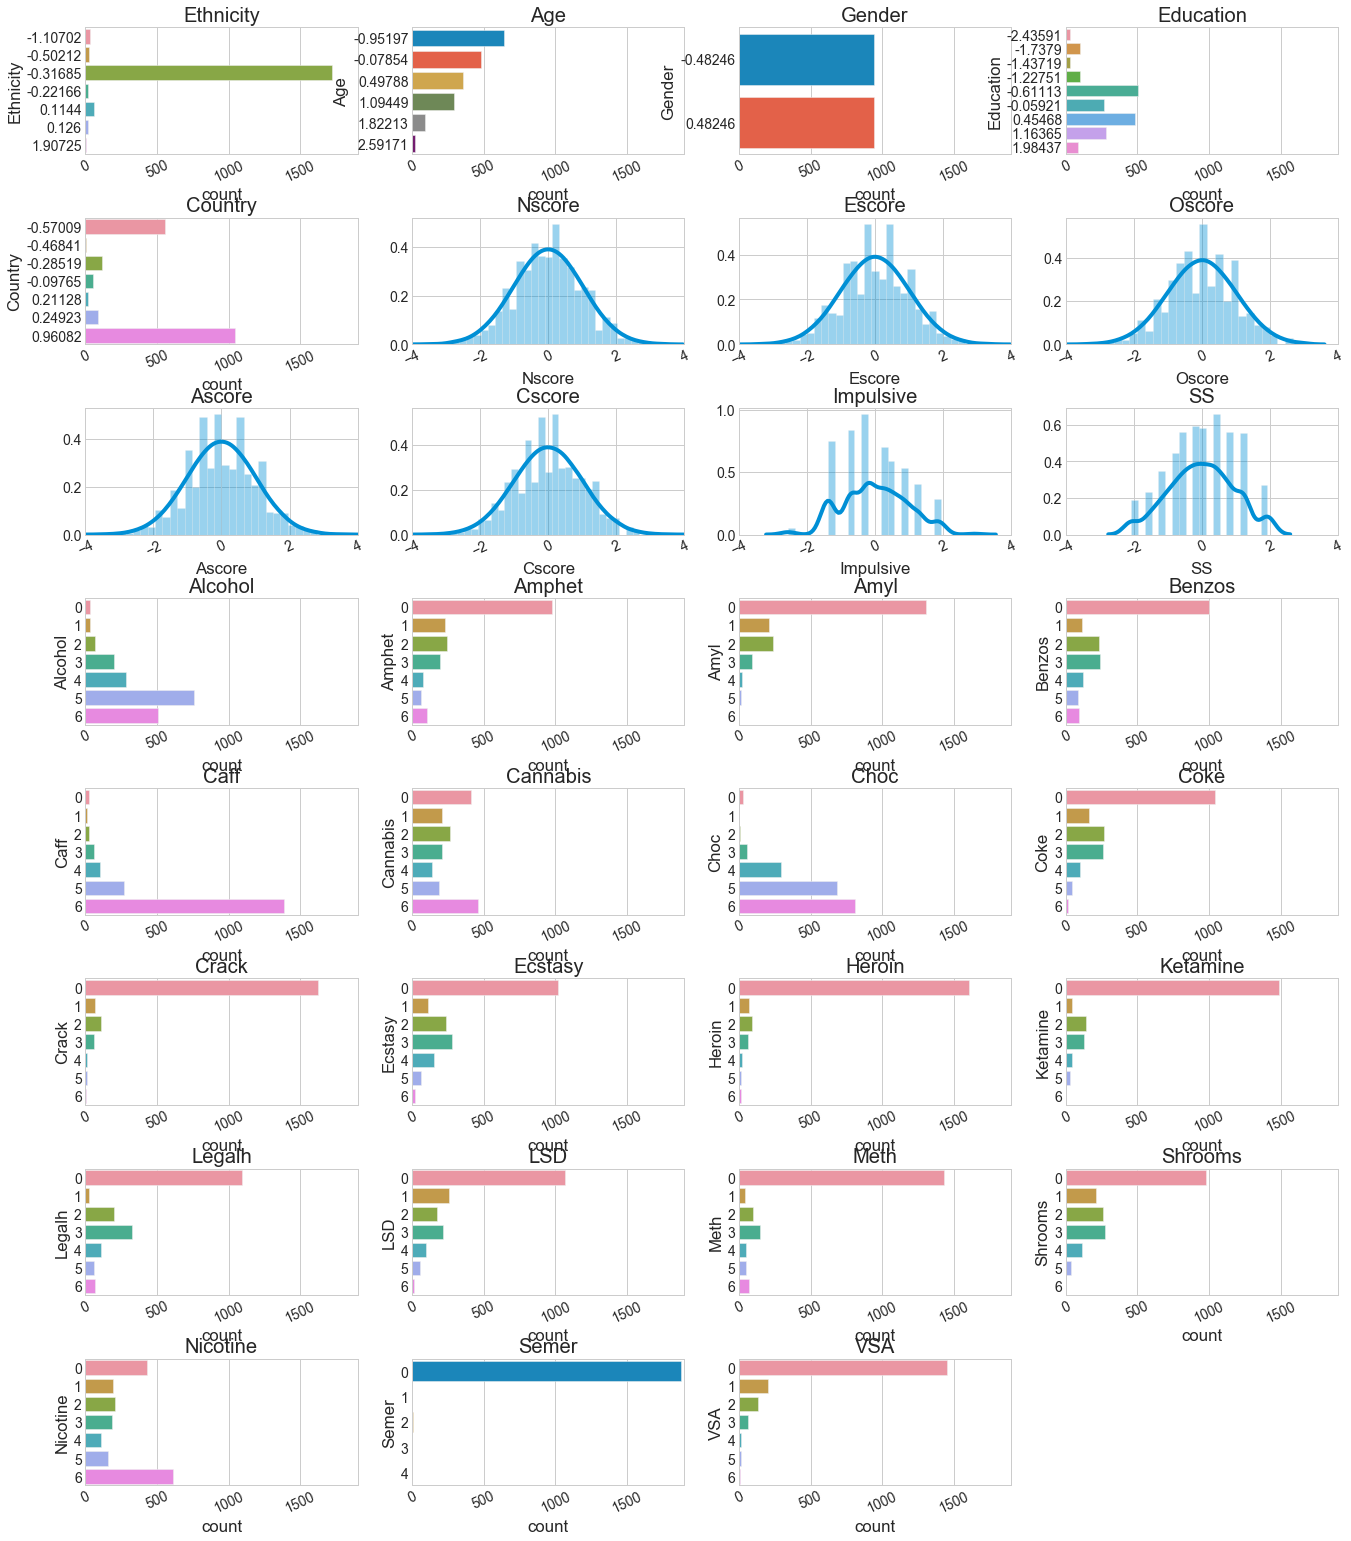

In [528]:
plot_distribution(df_tmp)

## Observations & Cleaning
1. Feature Education: We merge those instances that left school without degree because the categories contain only few instances and we don't expect an influence on the specific drug use. Because the label is a pseudo-continuous variable we average the labels by the mean value.

2. Feature Country: Likewise we handle the countries. We merge the countries New Zealand, Australia, Canada and Ireland to the group of others. As the average label we also use the mean value.

3. Feature Ethnicity: Ethnicity is very unbalanced. We drop this feature keeping in mind that our model is biased for white people.

4. Feature Semer: Semer (Semeron) is a fictinous drug which was introduced to identify over-claimers. We drop those instances that "use" semeron

5. Feature ID: ID doesn't contain any information. We drop this column

In [529]:
# Merge Labels: Education, Countries

# Education (Real) is level of education of participant and has one of the values:
# Value Meaning Cases Fraction
# -2.43591 Left school before 16 years 28 1.49%
# -1.73790 Left school at 16 years 99 5.25%
# -1.43719 Left school at 17 years 30 1.59%
# -1.22751 Left school at 18 years 100 5.31%
# -0.61113 Some college or university, no certificate or degree 506 26.84%
# -0.05921 Professional certificate/ diploma 270 14.32%
# 0.45468 University degree 480 25.46%
# 1.16365 Masters degree 283 15.01%
# 1.98437 Doctorate degree 89 4.72%

# We replace all the values below "Some college or university, ..." with the mean label of said labels
df.Education.replace(to_replace=df[df.Education < -0.61113].Education.unique()
                     , value=np.round(df[df.Education < -0.61113].Education.mean(), decimals=3)
                     , inplace=True)


# Country (Real) is country of current residence of participant and has one of the values:
# Value Meaning Cases Fraction
# 0.96082 UK 1044 55.38%
# 0.24923 Canada 87 4.62%
# 0.21128 Republic of Ireland 20 1.06%
# -0.09765 Australia 54 2.86%
# -0.28519 Other 118 6.26%
# -0.46841 New Zealand 5 0.27%
# -0.57009 USA 557 29.55%

# We replace all the values between "UK" and "USA" with the mean label of said labels
df.Country.replace(to_replace=df[(df.Country > -0.57009) & (df.Country < 0.96082)].Country.unique()
                     , value=np.round(df[(df.Country > -0.57009) & (df.Country < 0.96082)].Country.mean(), decimals=3)
                     , inplace=True)

In [530]:
# Drop instances: People who said they were using the fictitious drug semeron
df.drop(index=df[df.Semer > 0].index, axis=1, inplace=True)

In [531]:
# Drop Columns: ID, Semer, Ethnicity
cols_dropped = ['ID', 'Semer', 'Ethnicity']
df.drop(columns=cols_dropped, axis=0, inplace=True)

In [532]:
# Remove those from the column name lists
demographic.remove('Ethnicity')
drugs.remove('Semer')

# Defining the Targets

## Examining possible Target Variables

We want to predict if a person is a drug user or not, that is our potential target variables are the different drugs. Here we divide into legal and illegal drugs. Only the illegal drugs are considered as possible targets, the legal drugs are considered as features. We have 14 different illegal drugs. We examine these 14 variables further to define our targets. 

### Visualizing Colinearity of Drugs

In order to find possible linear dependencies between the drugs, we visualize their correlation in a heatmap.

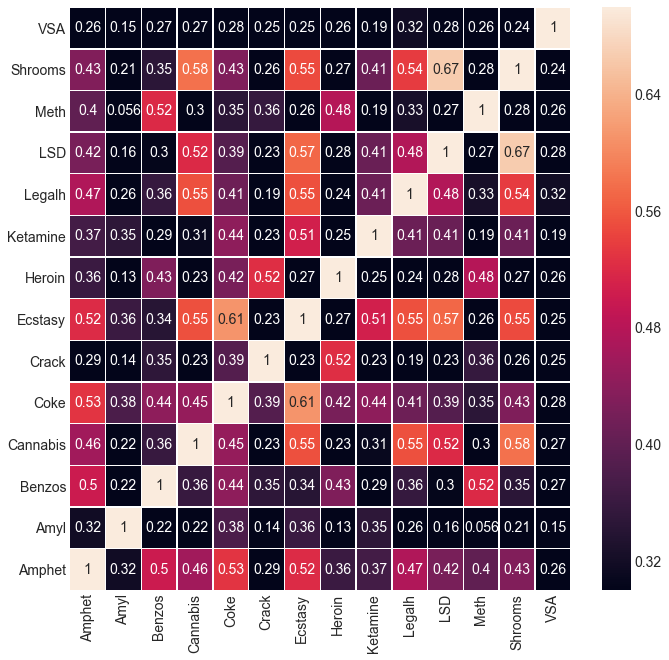

In [533]:
corr = df[drugs].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(corr, annot=True, linewidths=.5, vmin=0.3, vmax=0.7)
    ax.set_ylim((0,14))

### Creating Target Groups

By looking at the correlation heatmap we define drug-clusters of correlating drugs. The metric as the measure of collinearity is the correlation-coefficient. We consider correlations higher than 0.4 and see that Ecstasy shows highest correlations with other drugs. We define the first group as group_ecstasy. We take those drugs into this group that have a higher correlation coefficient than 0.4 with Ecstasy. We then go on to the drug with the next highest correlation with other drugs, which is not in the ecstasy_group. This is Benzodiacepines, so group_benzos is the next group we define. The last drug remaining forming a group is Crack, so we define group_crack. Having done this we have three target groups. **Note:** Duplicates between those groups are possible.

In [534]:
# Print the sum of all correlations higher than 0.4 for each drug
corr[corr > 0.4].sum().sort_values()

Amyl        1.000000
VSA         1.000000
Crack       1.524627
Meth        1.999048
Heroin      2.855161
Benzos      2.891503
Ketamine    3.178002
LSD         4.064963
Cannabis    4.117569
Amphet      4.339884
Legalh      4.418268
Shrooms     4.602133
Coke        4.740517
Ecstasy     4.868925
dtype: float64

In [535]:
# Ecstasy shows the highest correlations
# Print all correlations with Ecstasy higher than 0.4
corr[corr > 0.4].Ecstasy

Amphet      0.520795
Amyl             NaN
Benzos           NaN
Cannabis    0.553464
Coke        0.611472
Crack            NaN
Ecstasy     1.000000
Heroin           NaN
Ketamine    0.507360
Legalh      0.554284
LSD         0.572148
Meth             NaN
Shrooms     0.549402
VSA              NaN
Name: Ecstasy, dtype: float64

In [536]:
# Define the first target group based on the correlations, that are higher than 0.4
group_ecstasy = ['Amphet', 'Cannabis', 'Coke', 'Ecstasy'
                 , 'Ketamine', 'Legalh', 'LSD', 'Shrooms']

In [537]:
# The first variable in the order that didn't correlate with Ecstasy is the drug Benzos. 
# Print all correlations with Benzos higher than 0.4
corr[corr > 0.4].Benzos

Amphet      0.500174
Amyl             NaN
Benzos      1.000000
Cannabis         NaN
Coke        0.442867
Crack            NaN
Ecstasy          NaN
Heroin      0.428311
Ketamine         NaN
Legalh           NaN
LSD              NaN
Meth        0.520150
Shrooms          NaN
VSA              NaN
Name: Benzos, dtype: float64

In [538]:
# Define the second target group based on the correlations, that are higher than 0.4
group_benzos = ['Amphet', 'Coke', 'Benzos', 'Heroin', 'Meth']

In [539]:
# The first variable in the order that didn't correlate with Benzos is the drug Crack. 
# Print all correlations with Crack higher than 0.4
corr[corr > 0.4].Crack

Amphet           NaN
Amyl             NaN
Benzos           NaN
Cannabis         NaN
Coke             NaN
Crack       1.000000
Ecstasy          NaN
Heroin      0.524627
Ketamine         NaN
Legalh           NaN
LSD              NaN
Meth             NaN
Shrooms          NaN
VSA              NaN
Name: Crack, dtype: float64

In [540]:
# Define the third target group based on the correlations, that are higher than 0.4
group_crack = ['Crack', 'Heroin']

### Final Targets
Generally the idea is to predict drug users vs. non-users. We have data that says whether a person has used a drug in a certain time (day, week, month, etc), that is we have to define what exactly is a user and what is a non-user. To separate users from non-users we consider two scenarios. In the first scenario a drug user is defined as a person, who has used a drug at least in the last year and all others are considered as non-users. In the second scenario we define a drug user as a person, who used a drug at least in the last month and all the others are considered as non-users. These two scenarios are considered for each of our drug groups defined above. That is we predict if a person is a user/non-user for one of the drug groups. 

|**Scenario**| **type** |  **definition**                                              | **col_name**| **value**  |
|:--|:----------:|:-------------------------------------------------------------|------------|---|
|1| non-user | never, over a decade ago, last decade                        | yearly_user  | 0 |
|1| user     | last year, last month, last week, last day                   | yearly_user  | 1 |
|2| non-user | never, over a decade ago, last decade, last year             | monthly_user | 0 |
|2| user     | last month, last week, last day                              | monthly_user | 1 |

#### Generate Target Variables

Just to remember we have the following categories for each drug:
+ 0: Never Used
+ 1: Used over a Decade Ago
+ 2: Used in Last Decade
+ 3: Used in Last Year
+ 4: Used in Last Month
+ 5: Used in Last Week
+ 6: Used in Last Day

To define drug users/non-users for our two scenarios, we divide these six groups into two. For Scenario 1, we define a user as a person in category 4, 5 or 6 and the rest as a non-user. For scenario 2 we define a user as a person, that belongs to category 3, 4, 5 or 6 and the rest as a non-user. We create six target variables, one for each scenario and drug group, with entries 0 and 1, 1 meaning a user and 0 a non-user.

In [541]:
# Generate the target variables
# 1: user, 0: non-user
# In total we have 6 target variables 1 for each of the three groups for the two scenarios

for t, name_t in zip([3, 4], ['yearly', 'monthly']): # t is the relevant time threshold for separating the user/non-user groups
    for group, name_group in zip([group_ecstasy, group_benzos, group_crack], ['ecstasy', 'benzos', 'crack']):
        name = name_t + '_user_' + name_group
        mask = (df[group] >= t).any(axis=1)
        df[name] = mask.astype(np.int)

In [542]:
df.head()

,Age,Gender,Education,Country,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,...,Meth,Shrooms,Nicotine,VSA,yearly_user_ecstasy,yearly_user_benzos,yearly_user_crack,monthly_user_ecstasy,monthly_user_benzos,monthly_user_crack
0,0.49788,0.48246,-0.05921,0.96082,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,...,0,0,2,0,0,0,0,0,0,0
1,-0.07854,-0.48246,1.98437,0.96082,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,...,3,0,4,0,1,1,0,1,0,0
2,0.49788,-0.48246,-0.05921,0.96082,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,...,0,1,0,0,1,0,0,0,0,0
3,-0.95197,0.48246,1.16365,0.96082,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,...,0,0,2,0,0,1,0,0,0,0
4,0.49788,0.48246,1.98437,0.96082,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,...,0,2,2,0,1,0,0,0,0,0


#### Visualizing the Target Groups

To get an overview of our target groups we plot the number of users and non-users for each of our six prediction groups. In the plot we see that the target groups 'monthly crack users' and 'yearly crack users' are very unbalanced. The group of users doesn't consist of enough data points for a consistent prediction.
We thus drop the target variable crack-user for both scenarios. Doing this we also drop those instances that only use crack, because they would otherwise be declared as non-users consistently. Those that use additionally to crack other drugs are kept. Checking the dataset shows that all crack-users are also users of at least one other drug, so we don't have to delete further instances.

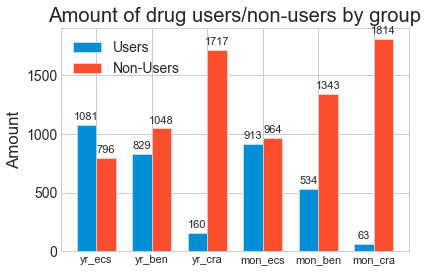

In [543]:
# Plot the six target variables

labels = ['yr_ecs', 'yr_ben', 'yr_cra', 'mon_ecs', 'mon_ben','mon_cra']
targets = ['yearly_user_ecstasy','yearly_user_benzos','yearly_user_crack'
           ,'monthly_user_ecstasy','monthly_user_benzos','monthly_user_crack']

users = []
non_users = []
for i in targets:
    users.append(df[i].sum())
    non_users.append(df.shape[0] - df[i].sum())

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, users, width, label='Users')
rects2 = ax.bar(x + width/2, non_users, width, label='Non-Users')

ax.set_ylabel('Amount')
ax.set_title('Amount of drug users/non-users by group')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.xaxis.set_tick_params(labelsize=11)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=11)


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [544]:
# We see that the target groups for crack users/non-users are very unbalanced for both scenarios
# We drop this target variable
# Check whether there are crack users, that don't use any other drug

df_tmp = df[(df['yearly_user_crack']==1) & 
             ((df['yearly_user_ecstasy']==0) & (df['yearly_user_benzos']==0)) |
             (df['monthly_user_crack']==1) &
             ((df['monthly_user_ecstasy']==0) & (df['monthly_user_benzos']==0))]

print(df.shape)
print(df_tmp.shape)

(1877, 35)
(0, 35)


In [545]:
# Since all crack users also consume other drugs, no instance has to be deleted. 
# We delete "monthly_user_crack" and "yearly_user_crack" from the dataframe.

df.drop(columns=["monthly_user_crack","yearly_user_crack"], axis=0, inplace=True)
targets.remove("monthly_user_crack")
targets.remove("yearly_user_crack")

# Feature Engeneering

Before setting up a model we have a further look at our potential features. These are the information about the demographic background, the personality scores and the consumption of legal drugs of a person.
To visualize linear dependencies betweeen the features a heatmap is shown. It can be seen, that the correlations between the features are in general low, except the variable "Impulsive Sensation Seeking Scale (SS)", which correlates with "Impulsiveness (Impulsive)". Since we suspect a connection of these two with regards to their content we drop "SS".

We decide to treat the scores as continous variables and the demographic variables as well as the legal drugs as categorical. That is we create dummy variables for the latter.

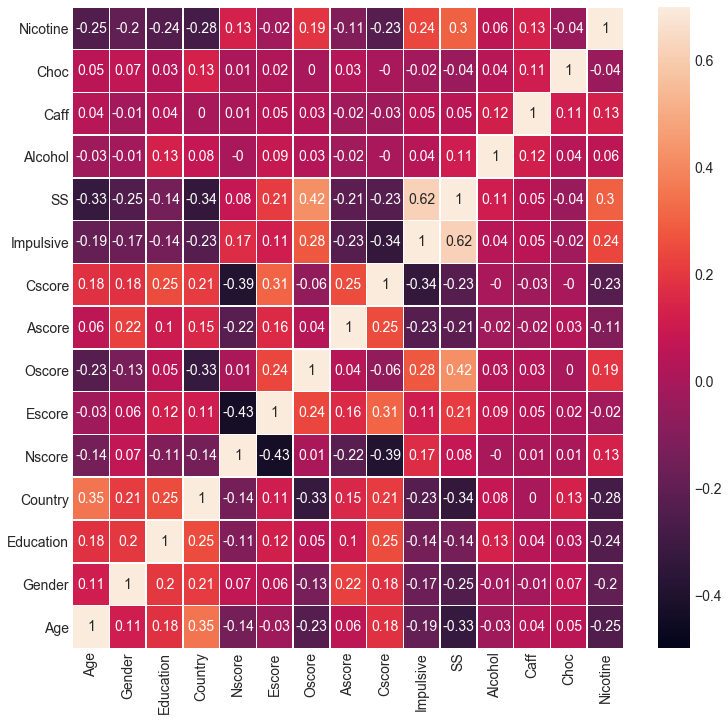

In [547]:
# Calculate correlations and plot heatmap

corr = df[demographic+personality+drugs_legal].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(11, 11))
    ax = sns.heatmap(round(corr,2), annot=True, linewidths=.5, vmin=-0.5, vmax=0.7)
    ax.set_ylim((0,15))

In [291]:
# In general the correlations between the features are low, except "SS" and "Impulsive". 
# We drop "SS".
df.drop(columns=["SS"], axis=0, inplace=True)
personality.remove("SS")

In [292]:
# Change demographic and legal drug features to categorical variables.
# Create dummys and drop first column 
df_dum_dem      = pd.get_dummies(df[demographic].astype(np.object), drop_first=True)
df_dum_drugs_le = pd.get_dummies(df[drugs_legal].astype(np.object), drop_first=True)

# Concat dummy variables and drop the old variables
df = pd.concat([df, df_dum_dem, df_dum_drugs_le], axis=1)
df.drop(columns=demographic, axis=0, inplace=True)
df.drop(columns=drugs_legal, axis=0, inplace=True)
print(df.shape)
df.head()

(1877, 61)


,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,Amphet,Amyl,Benzos,Cannabis,...,Choc_3,Choc_4,Choc_5,Choc_6,Nicotine_1,Nicotine_2,Nicotine_3,Nicotine_4,Nicotine_5,Nicotine_6
0,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,2,0,2,0,...,0,0,1,0,0,1,0,0,0,0
1,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,2,2,0,4,...,0,0,0,1,0,0,0,1,0,0
2,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0,0,0,3,...,0,1,0,0,0,0,0,0,0,0
3,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,0,0,3,2,...,0,1,0,0,0,1,0,0,0,0
4,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,1,1,0,3,...,0,0,0,1,0,1,0,0,0,0


In [293]:
df.columns

Index(['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'Amphet',
       'Amyl', 'Benzos', 'Cannabis', 'Coke', 'Crack', 'Ecstasy', 'Heroin',
       'Ketamine', 'Legalh', 'LSD', 'Meth', 'Shrooms', 'VSA',
       'yearly_user_ecstasy', 'yearly_user_benzos', 'monthly_user_ecstasy',
       'monthly_user_benzos', 'Age_-0.07854', 'Age_0.49788', 'Age_1.09449',
       'Age_1.82213', 'Age_2.59171', 'Gender_0.48246', 'Education_-0.61113',
       'Education_-0.05921', 'Education_0.45468', 'Education_1.16365',
       'Education_1.98437', 'Country_-0.054', 'Country_0.96082', 'Alcohol_1',
       'Alcohol_2', 'Alcohol_3', 'Alcohol_4', 'Alcohol_5', 'Alcohol_6',
       'Caff_1', 'Caff_2', 'Caff_3', 'Caff_4', 'Caff_5', 'Caff_6', 'Choc_1',
       'Choc_2', 'Choc_3', 'Choc_4', 'Choc_5', 'Choc_6', 'Nicotine_1',
       'Nicotine_2', 'Nicotine_3', 'Nicotine_4', 'Nicotine_5', 'Nicotine_6'],
      dtype='object')

In [294]:
# Rename the columns of the dummy variables
names={'Age_-0.07854':'Age_25-34'
       , 'Age_0.49788':'Age_35-44'
       , 'Age_1.09449':'Age_45-54'
       , 'Age_1.82213':'Age_55-64'
       , 'Age_2.59171':'Age_65+'
       , 'Gender_0.48246':'Gender_female'
       , 'Education_-0.61113':'Edu_nodiploma'
       , 'Education_-0.05921':'Edu_diploma'
       , 'Education_0.45468':'Edu_uni'
       , 'Education_1.16365':'Edu_masters'
       , 'Education_1.98437':'Edu_doc'
       , 'Country_-0.054':'Country_other'
       , 'Country_0.96082':'Country_UK'}

df.rename(columns=names, inplace=True)
df.columns

Index(['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'Amphet',
       'Amyl', 'Benzos', 'Cannabis', 'Coke', 'Crack', 'Ecstasy', 'Heroin',
       'Ketamine', 'Legalh', 'LSD', 'Meth', 'Shrooms', 'VSA',
       'yearly_user_ecstasy', 'yearly_user_benzos', 'monthly_user_ecstasy',
       'monthly_user_benzos', 'Age_25-34', 'Age_35-44', 'Age_45-54',
       'Age_55-64', 'Age_65+', 'Gender_female', 'Edu_nodiploma', 'Edu_diploma',
       'Edu_uni', 'Edu_masters', 'Edu_doc', 'Country_other', 'Country_UK',
       'Alcohol_1', 'Alcohol_2', 'Alcohol_3', 'Alcohol_4', 'Alcohol_5',
       'Alcohol_6', 'Caff_1', 'Caff_2', 'Caff_3', 'Caff_4', 'Caff_5', 'Caff_6',
       'Choc_1', 'Choc_2', 'Choc_3', 'Choc_4', 'Choc_5', 'Choc_6',
       'Nicotine_1', 'Nicotine_2', 'Nicotine_3', 'Nicotine_4', 'Nicotine_5',
       'Nicotine_6'],
      dtype='object')

# Predictive Modelling

## Metric to evaluate the Model

We don't want to unsettle people unnecessarily, that is we don't want to predict a person to be a drug user, when he/she is not a drug user. That means want that our prediction has a low rate on False Positives (FP), or in other words we want to maximize the **precision**.

## Define Target and Features for modelling

We devide the problem into four binary classification problems. We make a prediction for each drug group (group_ecstasy and group_benzos) for each of our two scenarios (yearly and monthly users). That is, in total we have four prediction models - one for each binary problem. The binary problems are "stored" in the list "targets". For the moment we keep all possible features. They are stored in the list "features".

In [295]:
features = ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 
       'Age_25-34', 'Age_35-44', 'Age_45-54', 'Age_55-64', 'Age_65+', 
       'Gender_female', 'Edu_nodiploma', 'Edu_diploma',
       'Edu_uni', 'Edu_masters', 'Edu_doc', 'Country_other', 'Country_UK',
       'Alcohol_1', 'Alcohol_2', 'Alcohol_3', 'Alcohol_4', 'Alcohol_5',
       'Alcohol_6', 'Caff_1', 'Caff_2', 'Caff_3', 'Caff_4', 'Caff_5', 'Caff_6',
       'Choc_1', 'Choc_2', 'Choc_3', 'Choc_4', 'Choc_5', 'Choc_6',
       'Nicotine_1', 'Nicotine_2', 'Nicotine_3', 'Nicotine_4', 'Nicotine_5',
       'Nicotine_6']
targets = ['yearly_user_ecstasy', 'yearly_user_benzos', 'monthly_user_ecstasy', 'monthly_user_benzos']

In [296]:
df.columns

Index(['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'Amphet',
       'Amyl', 'Benzos', 'Cannabis', 'Coke', 'Crack', 'Ecstasy', 'Heroin',
       'Ketamine', 'Legalh', 'LSD', 'Meth', 'Shrooms', 'VSA',
       'yearly_user_ecstasy', 'yearly_user_benzos', 'monthly_user_ecstasy',
       'monthly_user_benzos', 'Age_25-34', 'Age_35-44', 'Age_45-54',
       'Age_55-64', 'Age_65+', 'Gender_female', 'Edu_nodiploma', 'Edu_diploma',
       'Edu_uni', 'Edu_masters', 'Edu_doc', 'Country_other', 'Country_UK',
       'Alcohol_1', 'Alcohol_2', 'Alcohol_3', 'Alcohol_4', 'Alcohol_5',
       'Alcohol_6', 'Caff_1', 'Caff_2', 'Caff_3', 'Caff_4', 'Caff_5', 'Caff_6',
       'Choc_1', 'Choc_2', 'Choc_3', 'Choc_4', 'Choc_5', 'Choc_6',
       'Nicotine_1', 'Nicotine_2', 'Nicotine_3', 'Nicotine_4', 'Nicotine_5',
       'Nicotine_6'],
      dtype='object')

In [297]:
# Define test and train datasets
# Note: The division in train and test set is done for all targets together
# We will address the respective target variable via "masking" the y_test or y_train dataframe
# e.g. y_test['monthly_user_ecstasy']

X_train, X_test, y_train, y_test = train_test_split(df[features]
                                                    , df[targets]
                                                    , stratify = df[targets]
                                                    , test_size=0.2, random_state=random_seed)                                    


In [298]:
# Even though most of the data have been alredy scaled 
# we will scale everything again because we use distance-based models like KNN
# Note: Scaling the target variable is not necesarry as we consider a classification

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=df[features].columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=df[features].columns)

## Defining the Baseline

To evaluate our models we need a baseline to compare with. In our case the goal is to predict drug users (which are class 1) and the metric we consider is the precision. The baseline prediction we can make is predicting every person as a drug user. The precision of this prediction will be the ratio between drug users and all instances.

**Note:** We cannot use as baseline the prediction of the majority class, because if the majority class is non-user the resulting precision would be 0.

In [299]:
baselines = y_train.sum()/y_train.shape[0]
baselines

yearly_user_ecstasy     0.576282
yearly_user_benzos      0.441706
monthly_user_ecstasy    0.486342
monthly_user_benzos     0.284477
dtype: float64

## Model Selection

We try a selection of classifiers for our problem with default parameters and evaluate them. We will compare the different metrics, especially we will consider the precision as this is the metric we are interested in. As classifiers we consider: **Logistic Regression, k-nearest neighbor (KNN), Support Vector machine (SVC), Random Forest, Adaboost and XGBoost**. We use **cross validation** on our training set for the model evaluation. The sklearn function *cross_validate* performs the fitting and gives the desired metric (e.g. precision) for each fold. We use the mean of these values as our metric on which we evaluate the models. As mentioned before we evaluate the models on precision, but for the sake of interest we also have a look at several other metrics. The results of the metrics of the different classifiers are visualized in a plot 

### Cross Validation of selected Models

In the following a function is defined that perform the cross validation of a model and returns the metrics accuracy, precision, f1-score and the roc-auc score (by default). The metric is the mean of the different metric values of the folds in the cross validation. The function is then performed on a list of classifiers and the resulting metrics are stored in a dictionary.

In [300]:
# Function that performs cross validation and returns the desired metric(s)
# The metrics are stored in a dictionary
def model_evaluation(X_train, y_train, clf, 
                     params_model=None, 
                     params_cross={"cv":5, "scoring":['accuracy','precision','f1','roc_auc']}):
    
    # cross validation
    scores = cross_validate(clf, X_train, y_train, **params_cross)
    # return the list of all dictionary keys with mean values (mean over metrics from folds) 
    scores = {key: value.mean() for (key, value) in scores.items()}

    return scores

In [301]:
# Define a list of the considered models
clf = [LogisticRegression(solver="lbfgs")
       , KNeighborsClassifier(n_neighbors=5)
       , SVC(C=1, kernel="rbf", gamma='scale')
       , RandomForestClassifier(n_estimators=500, criterion="gini", max_depth=5)
       , AdaBoostClassifier()
       , XGBClassifier()]

In [302]:
# Perform the model evaluation for all models in clf and all targets 
# Remember: targets = ['yearly_user_ecstasy', 'yearly_user_benzos', 'monthly_user_ecstasy', 'monthly_user_benzos']
# Save the results in a dictionary, as follows: results ={'clf': {'target': {metrics}}}

results = {}
for model in clf:
    model_name = model.__class__.__name__
    results[model_name] = {}
    for target in targets:
        scores = model_evaluation(X_train, y_train[target], model)
        results[model_name][target] = scores        
#print(results)

### Visualization of the resulting Metrics

The metrics of the different models are shown in plots. Further the precision is explicitly shown in numbers. As we consider four different models we have to decide how we define "best". As we want to continue with one single model type for the four classification problems, we calculate the mean over the four targets and compare these means. In general the performance of the different classifiers does not differ very much within each target. However, Logistic Regression, RandomForest and Adaboost have the highest precision scores, so that we will continue with those three for hyperparameter tuning (next section).
Remarkable is that the precision and the f1-score are much lower for the target group 'monthly_users_benzos' for all classifiers. This is the target group, which is not balanced very well, which might be a reason for these results. 

In [303]:
# Define some variables for the plots
labels = ['yearly\necstasy', 'yearly\nbenzos','monthly\necstasy', 'monthly\nbenzos']
models_labels = ['LogReg', 'KNN', 'SVM', 'RF', 'Ada', 'XG']
models = list(results.keys())

In [304]:
# Function for the plots
# "results" is the dictionary containing the scores
# Remember: results = {'clf': {'target': {metrics}}

def plot_results(results, labels, models_labels, score='test_precision', title='Precision'):
    fig, ax = plt.subplots(figsize=(10,8))
    ax.set_facecolor((1.0, 250/255, 234/255))
    models = list(results.keys())
    
    x = np.arange(0, (len(models_labels)+2)*len(labels), len(models)+2)
    for mod in models:        
        mod_list = []
        x += 1
        for i in targets:
            mod_list.append(results[mod][i].get(score))
        rects1 = ax.bar(x - width/2, mod_list, width, label=mod, alpha=1)
        ax.set_ylabel('score')
        ax.set_title(title)
        ax.set_ylim(0,1)
        ax.set_xticks(x-len(models)/2)
        ax.set_xticklabels(labels)
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=3, fancybox=True)

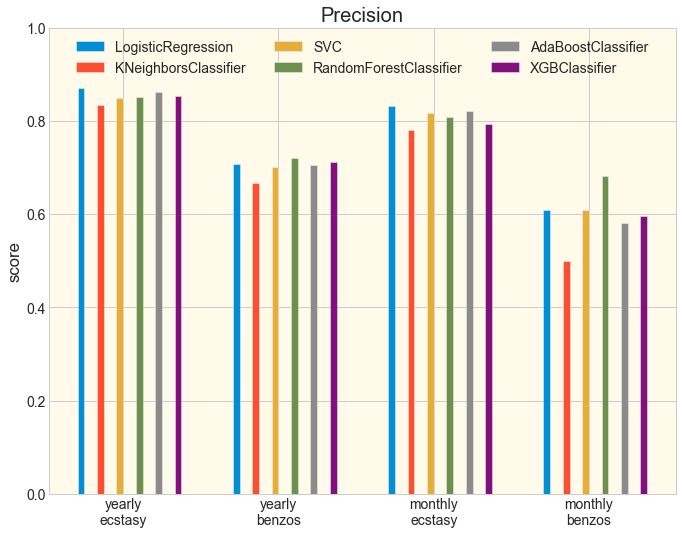

In [305]:
plot_results(results, labels, models_labels)

In [306]:
# Store the resulting precision score in a table
def print_score_table(results, score='test_precision', mean=False):
    clf = results.keys()
    targets = results[list(results.keys())[0]].keys()
    table = np.zeros([len(clf), len(targets)])
    for i, model in enumerate(clf):
        for j, target in enumerate(targets):
            table[i, j] = results[model][target].get(score)

    table = pd.DataFrame(table).T
    table.index = targets
    table.columns = clf
    if mean:
        return table.mean()
    else:    
        return table

In [307]:
# Display the values for the precision in a table
# For the different classifiers and targets
precision_scores = print_score_table(results, mean=False)
precision_scores

,LogisticRegression,KNeighborsClassifier,SVC,RandomForestClassifier,AdaBoostClassifier,XGBClassifier
yearly_user_ecstasy,0.869983,0.833609,0.849752,0.850302,0.862724,0.853273
yearly_user_benzos,0.707794,0.666480,0.700531,0.720197,0.705433,0.711649
monthly_user_ecstasy,0.831040,0.780082,0.816520,0.808796,0.821282,0.793024
monthly_user_benzos,0.609134,0.499428,0.609699,0.682855,0.581137,0.596793


In [308]:
# Display the mean precision score over all targets 
precision_scores_mean = print_score_table(results, score='test_precision', mean=True)
precision_scores_mean

LogisticRegression        0.754488
KNeighborsClassifier      0.694900
SVC                       0.744126
RandomForestClassifier    0.765537
AdaBoostClassifier        0.742644
XGBClassifier             0.738685
dtype: float64

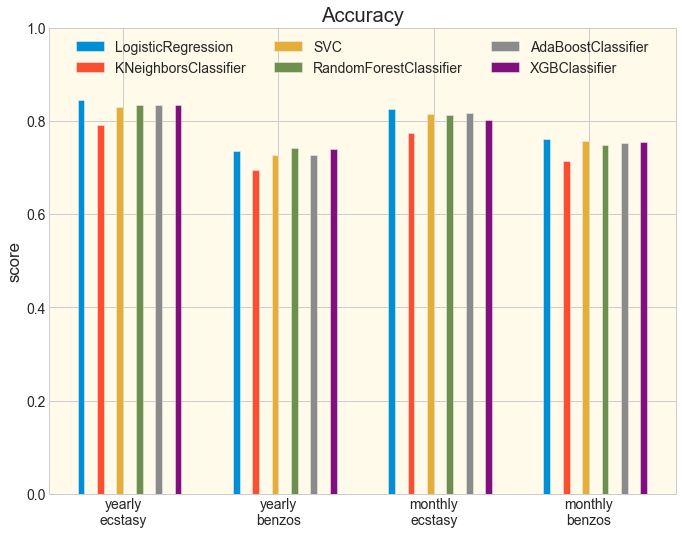

In [309]:
# for further interest we take a look into the accuracy, F1 and ROC AUC scores
plot_results(results, labels, models_labels, score='test_accuracy', title='Accuracy')

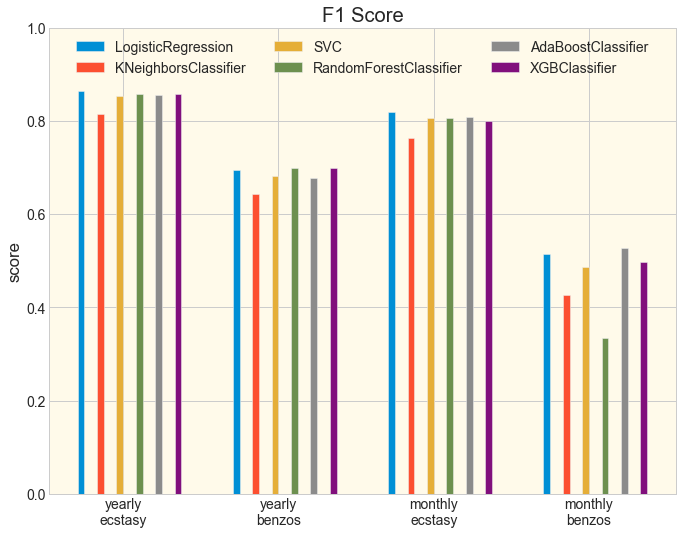

In [310]:
plot_results(results, labels, models_labels, score='test_f1', title='F1 Score')

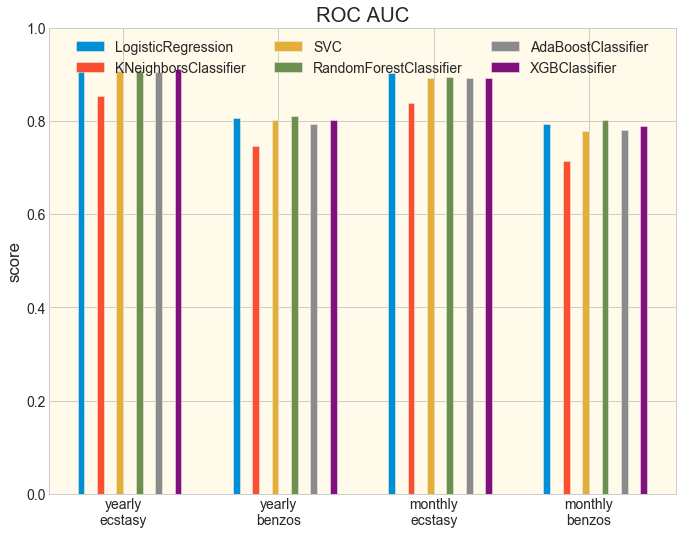

In [311]:
plot_results(results, labels, models_labels, score='test_roc_auc', title='ROC AUC')

## Hyperparameter optimization

In this section we continue with the three models that performed best on precision. These are Logistic Regression, Random Forest and AdaBoost. The models are improved by optimizing the hyperparameters to maximize the precision. To do that a gridsearch with cross validation (GridSearchCV) is performed. The results of these three models are then compared to decide the final model. We see that for all of the three models we achieve an improvement on our metric after applying the gridsearch.

### Gridseach to find the optimal Model

In [312]:
# Defining a list of classifiers
clfs = [LogisticRegression()
       , RandomForestClassifier()
       , AdaBoostClassifier()]

# Defining a list of parameters for the grid search
param_sets = [# parameters for logistic regression
          {'penalty':['elasticnet', 'none'],
           'C':[.01, .1, 1, 10, 100],
           'solver':['saga'],
           'n_jobs':[-1],
           'max_iter':[500],
           'l1_ratio':[0, .25, .5, .75, 1]},
          # parameters for RandomForest
          {'n_estimators':[100, 200, 300, 400, 500],
           'criterion':['gini', 'entropy'],
           'max_depth':[2, 4, 6, 8, 10],
           'n_jobs':[-1]},
          # parameters for AdaBoost
          {'base_estimator':[DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)],
           'learning_rate':[.1, .5, 1]}
         ]
          

In [313]:
# Gridsearch with scoring precision, returns the best estimator
def short_grid_search(X_train, y_train, clf, param):
    CLF = GridSearchCV(clf, param, scoring='precision', n_jobs=-1, cv=5)
    best_clf = CLF.fit(X_train, y_train)
    return best_clf.best_estimator_

In [314]:
def grid_search(X_train, y_train, clfs, param_sets):
    
    # perform the grid-search over all scenarios and all classifiers
    # and safe the results in a dictionary: grid_search_results = {model: {target: {best_estimator_}}}
    grid_search_results = {}
    for clf, param_set in zip(clfs, param_sets):
        grid_search_results[clf.__class__.__name__] = {}
        for target in targets:
            grid_search_results[clf.__class__.__name__][target] = short_grid_search(X_train
                                                                           , y_train[target]
                                                                           , clf
                                                                           , param_set)
    # evaluate the best classifiers and return the scores
    # safe scores in a dictionary: grid_search_scores = {model: {target: {scores}}}
    grid_search_scores = {}
    for model in grid_search_results.keys():
        grid_search_scores[model] = {}
        for target in grid_search_results[model].keys():
            scores = model_evaluation(X_train, y_train[target], grid_search_results[model].get(target))
            grid_search_scores[model][target] = scores
    
    return grid_search_results, grid_search_scores

In [315]:
grid_search_results, grid_search_scores = grid_search(X_train, y_train, clfs, param_sets)

### Visualization of the Metric Scores

In [316]:
# Some variables for the plot
labels = ['yr_ecs', 'yr_ben','mon_ecs', 'mon_ben']
models_labels = ['LogReg', 'RF', 'Ada']

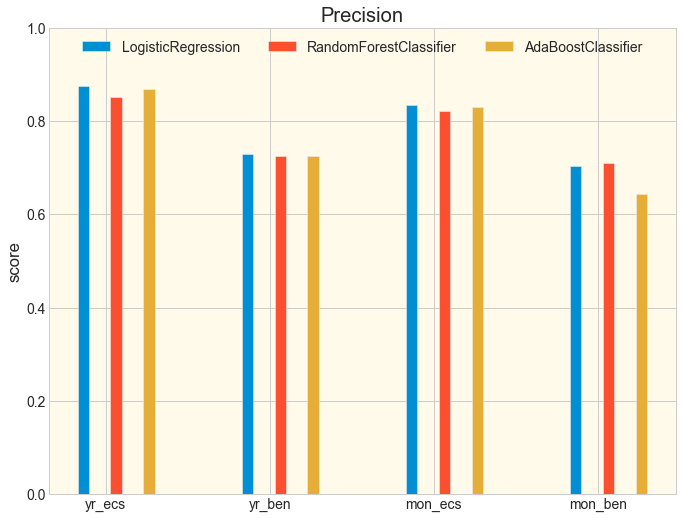

In [317]:
plot_results(grid_search_scores, labels, models_labels)

In [318]:
# Display the values for the precision in a table
# For the different classifiers and targets
grid_scores = print_score_table(grid_search_scores, mean=False)
grid_scores

,LogisticRegression,RandomForestClassifier,AdaBoostClassifier
yearly_user_ecstasy,0.875432,0.850239,0.867659
yearly_user_benzos,0.729585,0.724964,0.724485
monthly_user_ecstasy,0.833308,0.821393,0.830652
monthly_user_benzos,0.702814,0.709517,0.644262


In [319]:
grid_scores_mean = print_score_table(grid_search_scores, mean=True)
grid_scores_mean

LogisticRegression        0.785285
RandomForestClassifier    0.776528
AdaBoostClassifier        0.766764
dtype: float64

In [320]:
# By comparing the scores to the scores from above, 
# we see that we increased precision by about 1..3%-points
# LogisticRegression        0.754488
# KNeighborsClassifier      0.694900
# SVC                       0.744126
# RandomForestClassifier    0.766486
# AdaBoostClassifier        0.742644
# XGBClassifier             0.738685

### Final Model Selection

As we see from the previous section the results for the three models are quite close together, but Logistic Regression performs best as it returns the highest precision. We will therefore from now on continue with Logistic Regression. 

In [321]:
# Have a look at the parameters the gridsearch returned 
grid_search_results['LogisticRegression']

{'yearly_user_ecstasy': LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=0.75, max_iter=500,
                    multi_class='auto', n_jobs=-1, penalty='elasticnet',
                    random_state=None, solver='saga', tol=0.0001, verbose=0,
                    warm_start=False),
 'yearly_user_benzos': LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=1, max_iter=500,
                    multi_class='auto', n_jobs=-1, penalty='elasticnet',
                    random_state=None, solver='saga', tol=0.0001, verbose=0,
                    warm_start=False),
 'monthly_user_ecstasy': LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=1, max_iter=500,
                    multi_class='auto', n_jobs=-1, penalty='elasticnet',
                    random_state=None, solve

## Feature Selection

As we see above the parameters of the individual best estimators for each target don't spread much. For the business case we would like to have the app that is most easily to use. If we can drop out some features we won't need them in our user-survey. This makes it more user-friendly. Three of the four models had the l1_fraction set to 1 which is a lasso-regularization. Lasso is able to set feature importances to zero. Therefore we consider using lasso-regularization for all targets. To evaluate the disadvantage this would bring, we calculate the error that we would get by chosing setting the l1_fraction to 1 for the scenario 'monthly_user_benzos'. We evaluate this model by running through this all scenarios with l1_fraction set to 0 and comparing the precision with the precision we get from the first GridSearch.

In [322]:
clfs = [LogisticRegression()]

# parameters for the gridsearch with lasso regularization fixed 
param_sets = [# parameters for logistic regression
          {'penalty':['elasticnet', 'none'],
           'C':np.linspace(0.01,1,10),
           'solver':['saga'],
           'n_jobs':[-1],
           'max_iter':[500],
           'l1_ratio':[1]}]
          

In [323]:
# perform gridsearch with new parameters
gs_results_logreg, gs_scores_logreg = grid_search(X_train, y_train, clfs, param_sets)
grid_scores_logreg = print_score_table(gs_scores_logreg, mean=False)
grid_scores_logreg 

,LogisticRegression
yearly_user_ecstasy,0.875644
yearly_user_benzos,0.726962
monthly_user_ecstasy,0.832741
monthly_user_benzos,0.625011


We see a drop in precision of about 8%-points in the target 'monthly_user_benzos'. This is too high to compensate the possibility of dropping a few features. We go back to allow l1_ratio other than one.
To get an impression of the importance of the features and of features that might be dropped, we have a look at the coefficients of the three other models, which resulted with lasso-regularization. The results show that alcohol, chocolate and caffeine aren't very promising predictors. We drop those features and compare the results to our previous ones.

In [324]:
# models with lasso regularization
m2 = gs_results_logreg['LogisticRegression'].get('yearly_user_benzos')
m3 = gs_results_logreg['LogisticRegression'].get('monthly_user_ecstasy')

In [325]:
# Show the coefficients together with the feature names
sorted(zip(*m2.coef_,features))

[(-0.7414186815525263, 'Country_UK'),
 (-0.15318369843020382, 'Ascore'),
 (-0.15242083997495268, 'Country_other'),
 (-0.14659737141415188, 'Gender_female'),
 (-0.14617111183283105, 'Age_45-54'),
 (-0.13534501325567175, 'Age_55-64'),
 (-0.12381177254114192, 'Caff_2'),
 (-0.10081061813526898, 'Age_35-44'),
 (-0.09671966345290106, 'Edu_masters'),
 (-0.09377649186129106, 'Cscore'),
 (-0.08281808956188419, 'Nicotine_2'),
 (-0.06230877248107591, 'Choc_1'),
 (-0.035066305777134064, 'Edu_uni'),
 (-0.02275567783547658, 'Alcohol_4'),
 (-0.013388214777003096, 'Edu_nodiploma'),
 (-0.009837154332039622, 'Alcohol_2'),
 (0.0, 'Alcohol_5'),
 (0.0, 'Caff_3'),
 (0.0, 'Caff_4'),
 (0.0, 'Caff_6'),
 (0.0, 'Choc_2'),
 (0.0, 'Choc_3'),
 (0.0, 'Choc_5'),
 (0.0, 'Choc_6'),
 (0.0, 'Edu_diploma'),
 (0.002750907538017013, 'Age_65+'),
 (0.005317787063672027, 'Alcohol_6'),
 (0.008130962348785582, 'Nicotine_1'),
 (0.010618316188190032, 'Alcohol_1'),
 (0.012677926626504537, 'Caff_1'),
 (0.02680765570210855, 'Edu_doc'

In [326]:
# Delete all alcohol, caffeine and chocolate features
features2 = [feat for feat in features if all([('Alcohol' not in feat), ('Caff' not in feat), ('Choc' not in feat)])]

In [327]:
# Define parameters for gridsearch
# For C and l1_ratio more values are allowed to further opzimize
clfs = [LogisticRegression()]

param_sets = [# parameters for logistic regression
          {'penalty':['elasticnet'],
           'C':np.linspace(0.01,1,10),
           'solver':['saga'],
           'n_jobs':[-1],
           'max_iter':[500],
           'l1_ratio':np.linspace(0.1,1,10)}]

In [328]:
# Perform gridsearch with new parameters
gs_results_logreg2, gs_scores_logreg2 = grid_search(X_train[features2], y_train, clfs, param_sets)
grid_scores_logreg2 = print_score_table(gs_scores_logreg2, mean=False)

In [329]:
# Compare the results of our models with different parameter
# model with new opt. parameters | model with l1-ratio=1 | model after first gridsearch 
grid_scores_logreg2.join(grid_scores_logreg, rsuffix='_l-ratio1').join(grid_scores['LogisticRegression'], rsuffix='_orig')

,LogisticRegression,LogisticRegression_l-ratio1,LogisticRegression_orig
yearly_user_ecstasy,0.872538,0.875644,0.875432
yearly_user_benzos,0.735740,0.726962,0.729585
monthly_user_ecstasy,0.841399,0.832741,0.833308
monthly_user_benzos,0.725783,0.625011,0.702814


As we can see we have not only our 8%-points back they even grew to 10%-points for the 'monthly_user_benzos'. In addition we increased our precision on two other models slightly. All of that by dropping out the features and further optimization via gridsearch:

+ caffeine
+ chocolate
+ alcohol

In [330]:
# Have a look at the parameters of our new optimized and final model
gs_results_logreg2['LogisticRegression']

{'yearly_user_ecstasy': LogisticRegression(C=0.23, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=0.1, max_iter=500,
                    multi_class='auto', n_jobs=-1, penalty='elasticnet',
                    random_state=None, solver='saga', tol=0.0001, verbose=0,
                    warm_start=False),
 'yearly_user_benzos': LogisticRegression(C=0.12, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=1.0, max_iter=500,
                    multi_class='auto', n_jobs=-1, penalty='elasticnet',
                    random_state=None, solver='saga', tol=0.0001, verbose=0,
                    warm_start=False),
 'monthly_user_ecstasy': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=0.1, max_iter=500,
                    multi_class='auto', n_jobs=-1, penalty='elasticnet',
                    random_state=None

As we can see two of the models changed from being lasso regularized to not being regularized. This might be because we dropped those features that would be weighted with a 0 regularization coefficient by hand. As a result the remaining features will be weighted a little higher turning the model into a non-regularized model. **Conclusion:** Not all features improve model performance.

# Final Evaluation and Visualization

The moment of truth: We will now train the models we selected before with the whole training dataset. With those we will make predictions for our test dataset and evaluate the resulting precision. We additionally analyse the recall and the relation between these two metrics. We evaluate our model on precision, but also don't want the recall to be too low. It is also important to predict few False Negatives (FN) (which means a high recall value) to ensure that we predict a person that is a drug user as one. In this context we discuss whether or not to change the threshold in order to get a higher precision, but decide to leave it at the (default) value of 0.5 in order to not reduce the recall.

In [331]:
# Fitting on X_train and prediction on X_test
# Function returns a dictionary with the predictions, the probabilities and several metrics
def fit_eval(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_hat = clf.predict(X_test)
    y_hat_proba = clf.predict_proba(X_test)[:,1]
    precision, recall, threshold = precision_recall_curve(y_test, y_hat_proba)
    prec_score = precision_score(y_test, y_hat)
    rec_score = recall_score(y_test, y_hat)
    
    results = {}
    results['precision_score'] = prec_score
    results['recall_score'] = rec_score
    results['y_hat'] = y_hat
    results['y_hat_proba'] = y_hat_proba
    results['precision'] = precision
    results['recall'] = recall
    results['threshold'] = np.append(threshold, 1)
    results['classifier'] = clf
    
    return results

In [332]:
# Apply the above function to our targets and save the results
results = {}
for target in gs_results_logreg2['LogisticRegression'].keys():
    results[target] = fit_eval(gs_results_logreg2['LogisticRegression'].get(target)
             , X_train[features2], y_train[target]
             , X_test[features2], y_test[target])

In [333]:
# Show the resulting precision score for our four targets
[results[key]['precision_score'] for key in results.keys()]

[0.893719806763285, 0.725609756097561, 0.8457142857142858, 0.7142857142857143]

In [334]:
# Show the resulting recall score for our for targets
[results[key]['recall_score'] for key in results.keys()]

[0.8564814814814815,
 0.7168674698795181,
 0.8087431693989071,
 0.37383177570093457]

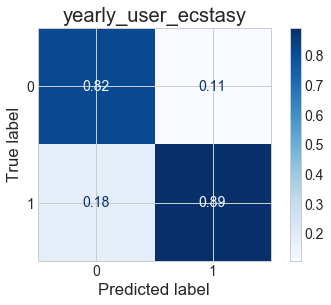

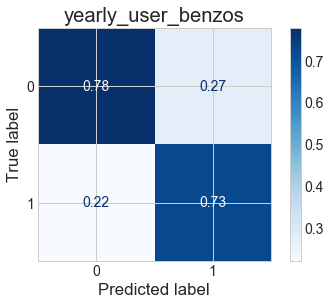

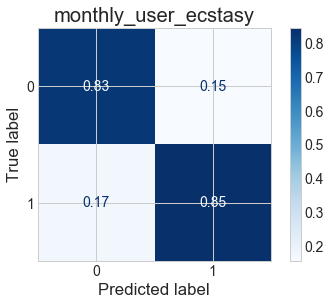

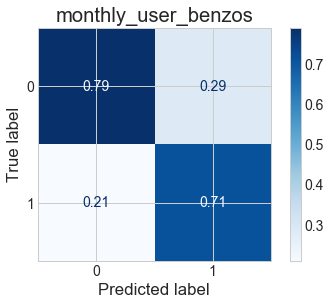

In [335]:
# Plot the confusion matrix for our four targets
for key in results.keys():
    disp = plot_confusion_matrix(results[key].get('classifier'), X_test[features2], y_test[key]
                                 , normalize='pred'
                                 , cmap=plt.cm.Blues)
    disp.ax_.set_title(key)

In [343]:
# Plot precision and recall vs. threshold
def plot_prt_curve(results, target):
    fig = plt.figure()
    
    a1 = fig.add_axes([0,0,1,1])
    a1.set_facecolor((1.0, 250/255, 234/255))

    a1.plot(results[target].get('threshold')
            , results[target].get('precision')
            , linewidth=2)
    a1.set_ylabel('Precision')
    a1.set_xlabel('Threshold')
    a1.set_ylim([0, 1])
    a1.set_title(target)
    a2 = a1.twinx()
    a2.plot(results[target].get('threshold')
            , results[target].get('recall')
            , 'r-', linewidth=2)
    a2.plot([.5, .5], [0, 1]
            , ':k', linewidth=2)
    a2.set_ylabel('Recall')
    a1.set_xlim([0, 1])
    a2.set_ylim([0, 1])
    fig.legend(labels = ('Precision','Recall'),loc=(.2, .2))
    plt.show()

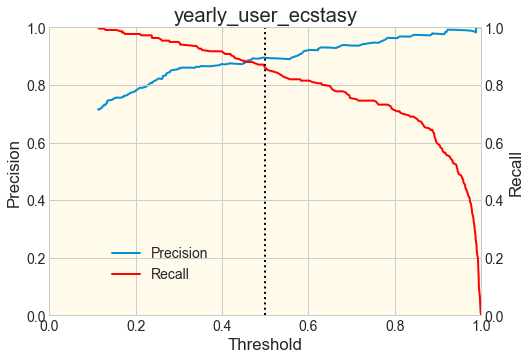

In [344]:
plot_prt_curve(results, 'yearly_user_ecstasy')

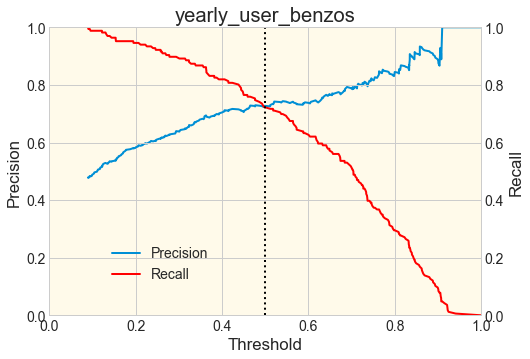

In [345]:
plot_prt_curve(results, 'yearly_user_benzos')

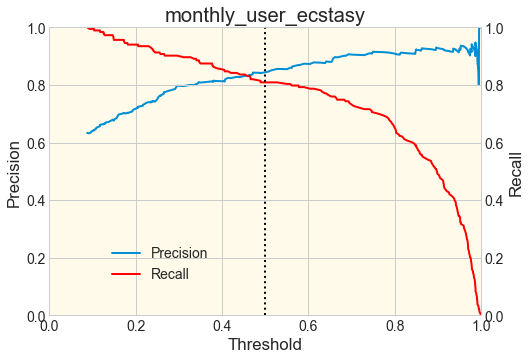

In [346]:
plot_prt_curve(results, 'monthly_user_ecstasy')

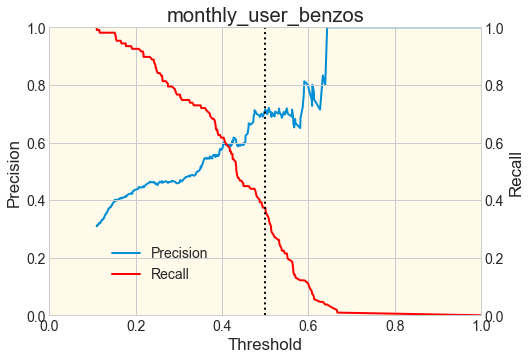

In [347]:
plot_prt_curve(results, 'monthly_user_benzos')

The results show that we achieve improved values for the precision by further optimizing the hyperparameters. The plots of the precision and recall curves versus the threshold additionally show that our values for precision and recall are balanced. Using a higher threshold to improve the precision would be possible, but this would reduce the recall, which is also an important metric for our model to be reliable. We therefore keep the (default) value of 0.5 as a threshold.

# Conclusions

* Logistic Regression gives the best results for our business case.
* All classifiers deliver very similar values for the precision.
* Using all feature not always gives the best model. (That is for our business case there is no need to survey caffeine, chocolate, alcohol)
* Have a further look at the model for the target "monthly_users_benzos", to reduce the effect of unbalanced targets.


# Future Work

* Definition of targets:
    * Other target groups or more might be considered, maybe there is one specific drug which is highly interested
* Definition of metric:
    * As discussed in the last section recall is also a possible metric for this business case. An optimization on recall might change the results. 
    * Unsettle (recall) vs. don't unsettle (precision) people
* Our survay data is from people who are already taking drugs. For pur prediction we use personality characteristics, which might change when taking drugs. We however assume that this is not the case. Otherwise we could not use this data to make predictions on potential drug users. This might be clarified talking to an expert.
* In our business case a possibility to overcome this and also to test the predictions might be an optional check whether a tested person turned into a drug user or not after a certain time. 
* Our model is biased for ethnicity “white”. If possible observations fromdifferent ethnicities should be included.
